# Sentiment analysis

# Twitter dataset

## Loading the data

In [ ]:
!pip install spacy --upgrade

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
import spacy
import en_core_web_sm
import pandas as pd
import seaborn as sns
import numpy as np
import re
import random
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/Cursos - recursos/NLP/train.csv', header = None,
                         names = ['sentiment', 'id', 'date', 'query', 'user', 'text'], encoding='latin1')

In [ ]:
train_data

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
train_data['sentiment'].unique()

array([0, 4])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


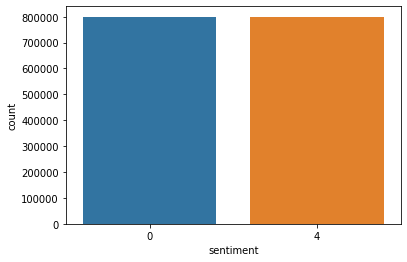

In [ ]:
sns.countplot(train_data['sentiment']);

In [ ]:
np.unique(train_data['sentiment'], return_counts=True)

(array([0, 4]), array([800000, 800000]))

In [ ]:
train_data = train_data.drop(['id', 'date', 'query', 'user'], axis=1)
train_data

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


## Train and test data

In [ ]:
X = train_data.iloc[:, 1].values
X

array(["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
       "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
       '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
       ..., 'Are you ready for your MoJo Makeover? Ask me for details ',
       'Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur ',
       'happy #charitytuesday @theNSPCC @SparksCharity @SpeakingUpH4H '],
      dtype=object)

In [ ]:
y = train_data.iloc[:, 0].values
y

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
from sklearn.model_selection import train_test_split
X, _, y, _ = train_test_split(X, y, test_size = 0.97)

In [ ]:
X

array(['@SpaNkiEs25 eb.. nxt time no need to follow me la go shopping :s henry says ur so tired today ',
       '@RuthGarrity  it was a lovely chat. He ddnt call so ill hav nothin new to tell u tomorrow but im sure we can talk about sumfin  Caru ti',
       'Is at school =P i ish hungries  karls asleep next to me lols',
       ..., '@minkus I like this one the best ',
       "@Jaaycooxo Lol, hiiiiii!!! It's ok.  Nuffin much, sugarplum! How about you?",
       'I wanted to get married once, but my fiance fell in love with another invisible person. '],
      dtype=object)

In [ ]:
X.shape

(48000,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train.shape, y_train.shape

((38400,), (38400,))

In [ ]:
X_test.shape, y_test.shape

((9600,), (9600,))

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 4]), array([19304, 19096]))

In [ ]:
np.unique(y_test, return_counts=True)

(array([0, 4]), array([4831, 4769]))

# Preprocessing the data

In [ ]:
nlp = spacy.load('en_core_web_sm')
nlp

In [ ]:
def preprocessing(sentence):
  sentence = sentence.lower()
  sentence = re.sub(r"@[A-Za-z0-9]+", ' ', sentence)
  sentence = re.sub(r"https?://[A-Za-z0-9./]+", ' ', sentence)
  sentence = sentence.replace('.', '')
  tokens = []
  tokens = [token.text for token in nlp(sentence) if not (token.is_stop or token.like_num or token.is_punct or token.is_space or len(token) == 1)]
  tokens = ' '.join([element for element in tokens])

  return tokens

In [ ]:
preprocessing("@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  2 You shoulda got David Carr of Third Day to do it. ;D")

'awww bummer shoulda got david carr day'

In [ ]:
X_train_cleaned = [preprocessing(tweet) for tweet in X_train]

In [ ]:
len(X_train_cleaned)

38400

In [ ]:
for _ in range(10):
  print(X_train_cleaned[random.randint(0, len(X_train_cleaned) - 1)])

shit hell tickets expensive great totally ridiculas price
sees right
gasworks add wine enjoy cold climate awesomeness
oohh fa
getting pimples lately maybe mum right chocolate
woke bed sooo taierd
startin rain time weeks
watching spongebob squarepants
haha sucks
looking tickets


In [ ]:
X_test_cleaned = [preprocessing(tweet) for tweet in X_test]

## Word cloud

In [ ]:
texts = ''
for text in X_train_cleaned:
  texts += ' ' + text

In [ ]:
texts

" thraot killing meee let know format harddrive gone rip farrah fawcett sad nt pain anymore thanks bro ordered turkey burger islands think gave veggie like turkey burgers trying hard eat better hmmm trevor itchy sick tummy explain yesterdays whining lmao young gooo damn year geee hate frustrating wish boo sleeping extremely eventful fun filled night got home going sleep bit watching videos mcfly paradiso believe happy everytime watch videos lt;33 oven look pretty good wait find taste probably heartattackalicious coffee pm plus sure today payday lol got parents house insanity excited got niece doin yard work today truly putting long wanted ryan forget tap dancing whoopee cushion routine audition good morning world study lot today tweet wanna miss thing gg sad sad sad amy leaving evanescence true online ym decades went online lol wake decided shall drive work today shall let taxi uncle earn money ankle pain certain days totally aware single today days posting tg plurk people saying net u

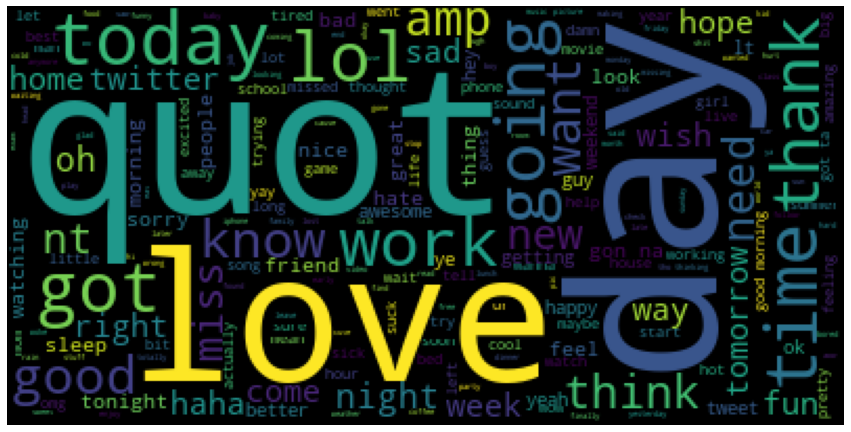

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud()
cloud = cloud.generate(texts)
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off');

# Detecting languages

In [ ]:
!pip install langdetect

In [ ]:
from langdetect import detect

In [ ]:
detect('This is an English text')

'en'

In [ ]:
detect('Este é um texto em português')

'pt'

In [ ]:
detect('Este es un texto en espanõl')

'es'

In [ ]:
languages = []
for text in X_test_cleaned:
  if text != '':
    languages.append(detect(text))

In [ ]:
np.unique(languages, return_counts=True)

(array(['af', 'ca', 'cs', 'cy', 'da', 'de', 'en', 'es', 'et', 'fi', 'fr',
        'hr', 'hu', 'id', 'it', 'lt', 'lv', 'nl', 'no', 'pl', 'pt', 'ro',
        'sk', 'sl', 'so', 'sq', 'sv', 'sw', 'tl', 'tr', 'vi'], dtype='<U2'),
 array([ 559,   65,   17,  147,  135,   27, 6723,   67,  135,   57,  158,
          24,    9,   92,  110,    9,    8,  196,  154,   51,   19,   53,
          25,   26,  292,   23,   75,   57,  182,   28,   13]))

# Sentiment analysis with NLTK

In [ ]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
nltk_classifier = SentimentIntensityAnalyzer()
nltk_classifier.polarity_scores('I love this food')

{'compound': 0.6369, 'neg': 0.0, 'neu': 0.323, 'pos': 0.677}

In [ ]:
nltk_classifier.polarity_scores('I hate this food')

{'compound': -0.5719, 'neg': 0.649, 'neu': 0.351, 'pos': 0.0}

In [ ]:
nltk_classifier.polarity_scores('I have this food')

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [ ]:
X_train_cleaned[0]

'kinda late saw ai final yesterdayit awesome best ve seen love'

In [ ]:
nltk_classifier.polarity_scores(X_train_cleaned[0])

{'compound': 0.926, 'neg': 0.0, 'neu': 0.39, 'pos': 0.61}

In [ ]:
X_train_cleaned[20002]

'bed time tomorrow payday day closer sunday'

In [ ]:
nltk_classifier.polarity_scores(X_train_cleaned[20002])

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [ ]:
for sentence in X_test:
  print(nltk_classifier.polarity_scores(sentence), ' - ', sentence)

Streaming output truncated to the last 5000 lines.
{'neg': 0.44, 'neu': 0.426, 'pos': 0.134, 'compound': -0.649}  -  Baaaaack!  Damn zombies, can't stop thinking about them :'(
{'neg': 0.06, 'neu': 0.698, 'pos': 0.241, 'compound': 0.7717}  -  Had a good day yesterday volunteering my time but did miss the @SixShooterR BBQ for the third year in a row. Heard the â« was great too 
{'neg': 0.098, 'neu': 0.902, 'pos': 0.0, 'compound': -0.3612}  -  Redid my makeup twice &amp; eventually ended up barefaced. Both my mac &amp; maybelline foundation are too pinkish on me. Sucks to be yellow. 
{'neg': 0.0, 'neu': 0.534, 'pos': 0.466, 'compound': 0.5399}  -  @rocknrod Aw, gosh! Thanks, John! 
{'neg': 0.0, 'neu': 0.478, 'pos': 0.522, 'compound': 0.9202}  -  Still hungry but want to go on holiday nowwww  Sunshine. Funtime. Most important, tan time!!!!!!!!  http://twitpic.com/7u4tp
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}  -  : soccer tryouts today! pumped 
{'neg': 0.0, 'neu': 0.828, 'po

# Sentiment analysis with TF-IDF

In [ ]:
X_train_cleaned[0:5]

['thraot killing meee',
 'let know',
 'format harddrive gone',
 'rip farrah fawcett sad nt pain anymore',
 'thanks bro']

In [ ]:
y_train

array([0, 4, 0, ..., 0, 0, 4])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_cleaned)

In [ ]:
X_train_tfidf.toarray().shape

(38400, 33631)

In [ ]:
len(vectorizer.get_feature_names())

33631

In [ ]:
def preprocessing_lemma(sentence):
  tokens = []
  tokens = [token.lemma_ for token in nlp(sentence)]
  tokens = ' '.join([element for element in tokens])
  return tokens 

In [ ]:
preprocessing_lemma('learn learned learning')

'learn learn learn'

In [ ]:
X_train_cleaned_lemma = [preprocessing_lemma(tweet) for tweet in X_train_cleaned]

In [ ]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_cleaned_lemma)

In [ ]:
X_train_tfidf.shape

(38400, 30048)

In [ ]:
X_test_cleaned_lemma = [preprocessing_lemma(tweet) for tweet in X_test_cleaned]

In [ ]:
X_test_tfidf = vectorizer.transform(X_test_cleaned_lemma)

In [ ]:
X_test_tfidf.shape

(9600, 30048)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
predictions = classifier.predict(X_test_tfidf)

In [ ]:
predictions

array([0, 0, 0, ..., 4, 0, 0])

In [ ]:
y_test

array([0, 4, 0, ..., 4, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
accuracy_score(y_test, predictions)

0.6782291666666667

In [ ]:
cm = confusion_matrix(y_test, predictions)
cm

array([[3429, 1402],
       [1687, 3082]])

In [ ]:
(3429 + 3082) / 9600

0.6782291666666667

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69      4831
           4       0.69      0.65      0.67      4769

    accuracy                           0.68      9600
   macro avg       0.68      0.68      0.68      9600
weighted avg       0.68      0.68      0.68      9600



# Sentiment analysis with spaCy

- Documentation: https://spacy.io/usage/training

In [ ]:
example = [["this is a positive text", {"POSITIVE": True, "NEGATIVE": False}],
           ["this is a negative text", {"POSITIVE": False, "NEGATIVE": True}]]

In [ ]:
X_train_spacy = []
for text, sentiment in zip(X_train_cleaned_lemma, y_train):
  #print(text, sentiment)
  if sentiment == 4:
    dic = ({'POSITIVE': True, 'NEGATIVE': False})
  elif sentiment == 0:
    dic = ({'POSITIVE': False, 'NEGATIVE': True})
  X_train_spacy.append([text, dic.copy()])

In [ ]:
X_train_spacy[0:5]

[['thraot kill meee', {'NEGATIVE': True, 'POSITIVE': False}],
 ['let know', {'NEGATIVE': False, 'POSITIVE': True}],
 ['format harddrive go', {'NEGATIVE': True, 'POSITIVE': False}],
 ['rip farrah fawcett sad nt pain anymore',
  {'NEGATIVE': True, 'POSITIVE': False}],
 ['thank bro', {'NEGATIVE': False, 'POSITIVE': True}]]

In [ ]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [ ]:
classifier_spacy = spacy.blank('en')
classifier_spacy.pipe_names

[]

In [ ]:
textcat = classifier_spacy.add_pipe('textcat')
classifier_spacy.pipe_names

['textcat']

In [ ]:
textcat.add_label('POSITIVE')
textcat.add_label('NEGATIVE')

1

In [ ]:
textcat.label_data

('POSITIVE', 'NEGATIVE')

In [ ]:
len(X_train_spacy)

38400

In [ ]:
38400 / 1024

37.5

In [ ]:
from spacy.training import Example
classifier_spacy.begin_training()
for epoch in range(10):
  random.shuffle(X_train_spacy)
  losses = {}
  for batch in spacy.util.minibatch(X_train_spacy, 1024):
    texts = [classifier_spacy.make_doc(text) for text, entities in batch]
    annotations = [{'cats': entities} for text, entities in batch]
    examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(texts, annotations)]
    classifier_spacy.update(examples, losses=losses)
  print(losses)

{'textcat': 1.6026756810560983e-05}
{'textcat': 1.201389869720515e-05}
{'textcat': 8.997570574820202e-06}
{'textcat': 5.789221816598911e-06}
{'textcat': 3.6566665713166913e-06}
{'textcat': 2.402447112359596e-06}
{'textcat': 1.6881604967267094e-06}
{'textcat': 1.3331031780694502e-06}
{'textcat': 1.1443077809758506e-06}
{'textcat': 1.0330068889174981e-06}


In [ ]:
classifier_spacy.to_disk('classifier_spacy')

In [ ]:
classifier_spacy_loaded = spacy.load('classifier_spacy')
classifier_spacy_loaded

In [ ]:
y_test[4863]

4

In [ ]:
positive_text = X_test_cleaned_lemma[4863]
positive_text

'sun shine happy'

In [ ]:
prediction = classifier_spacy_loaded(positive_text)
prediction

sun shine happy

In [ ]:
prediction.cats

{'NEGATIVE': 0.007001080084592104, 'POSITIVE': 0.9929989576339722}

In [ ]:
classifier_spacy_loaded('i love this food').cats

{'NEGATIVE': 0.0019270960474386811, 'POSITIVE': 0.9980728626251221}

In [ ]:
y_test[4712]

0

In [ ]:
negative_text = X_test_cleaned_lemma[4712]
negative_text

'wake amp soo sad cause leave family day gon na miss'

In [ ]:
prediction = classifier_spacy_loaded(negative_text)
prediction.cats

{'NEGATIVE': 0.9999945163726807, 'POSITIVE': 5.430033070297213e-06}

In [ ]:
classifier_spacy_loaded('i hate this food').cats

{'NEGATIVE': 0.9991722106933594, 'POSITIVE': 0.0008278480381704867}

In [ ]:
predictions = []
for text in X_test_cleaned_lemma:
  prediction = classifier_spacy_loaded(text)
  predictions.append(prediction.cats)

In [ ]:
predictions

[{'NEGATIVE': 0.969436764717102, 'POSITIVE': 0.030563289299607277},
 {'NEGATIVE': 0.5756248831748962, 'POSITIVE': 0.42437511682510376},
 {'NEGATIVE': 0.99764484167099, 'POSITIVE': 0.002355082891881466},
 {'NEGATIVE': 0.9857784509658813, 'POSITIVE': 0.014221509918570518},
 {'NEGATIVE': 0.9998500347137451, 'POSITIVE': 0.00014999607810750604},
 {'NEGATIVE': 0.001401102519594133, 'POSITIVE': 0.9985988736152649},
 {'NEGATIVE': 0.9970452189445496, 'POSITIVE': 0.0029547992162406445},
 {'NEGATIVE': 0.9997441172599792, 'POSITIVE': 0.0002559224667493254},
 {'NEGATIVE': 3.287681465735659e-05, 'POSITIVE': 0.999967098236084},
 {'NEGATIVE': 0.00013487799151334912, 'POSITIVE': 0.9998650550842285},
 {'NEGATIVE': 0.9999752044677734, 'POSITIVE': 2.4771921744104475e-05},
 {'NEGATIVE': 0.9995137453079224, 'POSITIVE': 0.0004862120549660176},
 {'NEGATIVE': 0.9847956895828247, 'POSITIVE': 0.015204349532723427},
 {'NEGATIVE': 0.0008358127670362592, 'POSITIVE': 0.9991642236709595},
 {'NEGATIVE': 0.000178946385

In [ ]:
predictions2 = []
for prediction in predictions:
  if prediction['POSITIVE'] > prediction['NEGATIVE']:
    predictions2.append(4)
  else:
    predictions2.append(0)
predictions2 = np.array(predictions2)

In [ ]:
predictions2

array([0, 0, 0, ..., 0, 4, 0])

In [ ]:
y_test

array([0, 4, 0, ..., 4, 0, 0])

In [ ]:
accuracy_score(y_test, predictions2)

0.6908333333333333

In [ ]:
cm = confusion_matrix(y_test, predictions2)
cm

array([[3403, 1428],
       [1540, 3229]])

In [ ]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

           0       0.69      0.70      0.70      4831
           4       0.69      0.68      0.69      4769

    accuracy                           0.69      9600
   macro avg       0.69      0.69      0.69      9600
weighted avg       0.69      0.69      0.69      9600

